In [ ]:
import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

zipref= zipfile.ZipFile('10_food_classes_all_data.zip', 'r')
zipref.extractall()
zipref.close()

--2023-03-30 02:45:34--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.10.128, 142.251.12.128, 172.217.194.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.10.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  19.9MB/s    in 27s     

2023-03-30 02:46:01 (18.7 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import numpy as np
import matplotlib.image as mpimg
import random

In [ ]:
def view_image(path):
  lis=os.listdir(path)
  li=path + '/' + random.choice(lis)
  op=li + '/' + random.choice(os.listdir(li))
  im=mpimg.imread(op)
  ax=plt.imshow(im)

  return ax



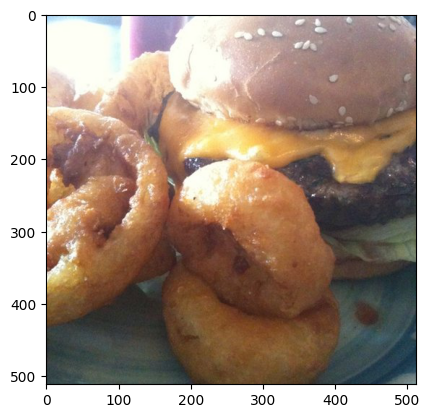

In [ ]:
view_image(test_dir)

In [ ]:
train_dir='/content/10_food_classes_all_data/train'
test_dir= '/content/10_food_classes_all_data/test'

In [ ]:
os.listdir(test_dir)

['steak',
 'grilled_salmon',
 'chicken_curry',
 'hamburger',
 'pizza',
 'chicken_wings',
 'sushi',
 'ramen',
 'fried_rice',
 'ice_cream']

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_gen = ImageDataGenerator(rescale=1./255, vertical_flip=True, zoom_range= 0.4, shear_range = 0.5,
                               rotation_range = 30, horizontal_flip= True)

test_gen = ImageDataGenerator(rescale=1./255, vertical_flip=True, zoom_range= 0.4, shear_range = 0.5,
                               rotation_range = 30, horizontal_flip= True)

In [ ]:
train_data= train_gen.flow_from_directory(directory= train_dir, target_size = (196,196),
                                          batch_size= 45)

test_data= test_gen.flow_from_directory(directory= test_dir, target_size = (196,196),
                                          batch_size= 45)

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [ ]:
import keras

In [ ]:
model=Sequential()

In [ ]:
model.add(Conv2D(filters=32, kernel_size=7, activation='relu', input_shape=(196,196,3)))
model.add(MaxPool2D(pool_size=3, strides=(2,2)))
model.add(Conv2D(filters=25, kernel_size=6, activation='relu'))
model.add(MaxPool2D(pool_size=3, strides=(2,2)))
model.add(Conv2D(filters=17, kernel_size=5, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=(1,1)))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(train_data,epochs=20,batch_size=15)

Epoch 1/20
167/167 [==============================] - 113s 602ms/step - loss: 2.2479 - accuracy: 0.1521
Epoch 2/20
167/167 [==============================] - 101s 606ms/step - loss: 2.1504 - accuracy: 0.2024
Epoch 3/20
167/167 [==============================] - 100s 599ms/step - loss: 2.1001 - accuracy: 0.2323
Epoch 4/20
167/167 [==============================] - 100s 598ms/step - loss: 2.0721 - accuracy: 0.2515
Epoch 5/20
167/167 [==============================] - 100s 601ms/step - loss: 2.0373 - accuracy: 0.2643
Epoch 6/20
167/167 [==============================] - 101s 606ms/step - loss: 2.0143 - accuracy: 0.2824
Epoch 7/20
167/167 [==============================] - 100s 600ms/step - loss: 1.9861 - accuracy: 0.2917
Epoch 8/20
167/167 [==============================] - 100s 599ms/step - loss: 1.9792 - accuracy: 0.2976
Epoch 9/20
167/167 [==============================] - 100s 598ms/step - loss: 1.9571 - accuracy: 0.3061
Epoch 10/20
167/167 [==============================] - 100s 597m

In [ ]:
effnet = "https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet21k_ft1k_m/feature_vector/2"

bit_mod ="https://tfhub.dev/google/bit/m-r152x4/1"

img_net= 'https://tfhub.dev/google/imagenet/resnet_v1_50/feature_vector/5'

In [ ]:
import tensorflow_hub as hb

In [ ]:
pret_layer=hb.KerasLayer(img_net,trainable=False,input_shape=(196,196,3))

In [ ]:
model=Sequential()

In [ ]:
model.add(pret_layer)
model.add(Dense(10,activation='sigmoid',))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(train_data,epochs=15,batch_size=45)

Epoch 1/15
167/167 [==============================] - 91s 525ms/step - loss: 1.3071 - accuracy: 0.5716
Epoch 2/15
167/167 [==============================] - 85s 510ms/step - loss: 0.9046 - accuracy: 0.7077
Epoch 3/15
167/167 [==============================] - 85s 510ms/step - loss: 0.8218 - accuracy: 0.7335
Epoch 4/15
167/167 [==============================] - 86s 514ms/step - loss: 0.7867 - accuracy: 0.7447
Epoch 5/15
167/167 [==============================] - 84s 503ms/step - loss: 0.7513 - accuracy: 0.7520
Epoch 6/15
167/167 [==============================] - 84s 504ms/step - loss: 0.7092 - accuracy: 0.7696
Epoch 7/15
167/167 [==============================] - 85s 511ms/step - loss: 0.6882 - accuracy: 0.7735
Epoch 8/15
167/167 [==============================] - 84s 502ms/step - loss: 0.6686 - accuracy: 0.7825
Epoch 9/15
167/167 [==============================] - 84s 504ms/step - loss: 0.6579 - accuracy: 0.7863
Epoch 10/15
167/167 [==============================] - 86s 513ms/step - l